Analisi esplorativa delle 50 HOT HITS ITALIA su Spotify
Cosa hanno di speciale?


In [6]:

%pip install spotipy


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Conextion to the Spotify's API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Secrets Keys to stablish conection 
clientId = "f85e0b0e755f4c06be267dc04778d896"
clientSecret = "5bae8cfd662c4923bfce80e1a14e71bd"

# Data transformation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None

import datetime

pd.set_option('display.max_columns', None)

La prima cosa da fare è ottenere le informazioni dall'API di Spotify. Per farlo, creiamo la seguente funzione che si connette all'API ed estrae le informazioni richieste. I soli parametri da inserire sono le chiavi per la connessione e il link della playlist da analizzare.

Dato che abbiamo una funzione che consente di connettersi all'API ed estrarre le informazioni, la proviamo con la playlist che desideriamo analizzare: Top 50 Global. Queste informazioni le trasformiamo in un dataframe per effettuare l'analisi.

In [9]:
def extractDataTracks(playlist_link, clientID, clientSecretID):
    """"This function connects to the Spotify API and extracts data
    about songs in a playlist. 

    Args:
        playlist_link (string): it's the link of the playlist. The playlist
            must contains all the songs that will be analysed.
        clientID (string): credendial requiared to connecto to the API.
        clienSecretID (string): secret credendial requiared to connecto to the 
        API.
    
    Returns: list of dictionaries. Each dictionary is a register.
    """
    # Authentication - without user
    client_credentials_manager = SpotifyClientCredentials(
        client_id=clientID, client_secret=clientSecretID)

    sp = spotipy.Spotify(
        client_credentials_manager = client_credentials_manager)

    # Extrackting URI's Tracks From a Playlist. 
    playlist_URI = playlist_link.split("/")[-1].split("?")[0]
    
    track_uris = [ x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"] ]
    l=[]
    
    for track in sp.playlist_tracks(playlist_URI)["items"]:
        track_uri = track["track"]["uri"]
        dict1 = {
            'id_track': track['track']['id'],
            'popularity_track': track["track"]["popularity"],
            'name_track': track["track"]["name"],
            'release_date': track['track']['album']['release_date'],
            'album': track["track"]["album"]["name"],
            'id_artist': track['track']['artists'][0]['id'],
            'name_artist': track["track"]["artists"][0]["name"]   
            #'genre': sp.artist(track["artists"][0]["external_urls"]["spotify"]['genres'])
        }
        dict2 = sp.audio_features(track_uri)[0]
        dict3 = sp.artist(track['track']['artists'][0]['id'])
        dict1 = dict1 | dict2 | dict3
        l.append(dict1)

    return l

In [25]:
# Data extraction
playlist_link_HotHitsItalia = 'https://open.spotify.com/playlist/37i9dQZF1DX6wfQutivYYr'
data = extractDataTracks(playlist_link_HotHitsItalia, clientId, clientSecret )

#vaguens = 'https://open.spotify.com/artist/0cE1FRPmspxRadK6z3zQb2?si=fe7ee670823640ad'
data = extractDataTracks(playlist_link_HotHitsItalia , clientId, clientSecret)

# Dataframe creation
df1 = pd.DataFrame(data) # First dataframe to work
df2 = pd.DataFrame(data) # Copy 
df1.head()

,id_track,popularity_track,name_track,release_date,album,id_artist,name_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,external_urls,followers,genres,href,images,name,popularity
0,6tP2AFUZkz4PuUfssawUBn,59,"BON TON (feat. Lazza, Blanco, Sfera Ebbasta & ...",2023-06-28,10,0qts5zYDAeK8dBmrdF2Zwq,Drillionaire,0.676,0.810,11,-5.209,1,0.0411,0.0815,0.000002,0.154,0.656,129.986,artist,0qts5zYDAeK8dBmrdF2Zwq,spotify:artist:0qts5zYDAeK8dBmrdF2Zwq,https://api.spotify.com/v1/tracks/6tP2AFUZkz4P...,https://api.spotify.com/v1/audio-analysis/6tP2...,238534,4,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 31252}",[italian hip hop],https://api.spotify.com/v1/artists/0qts5zYDAeK...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Drillionaire,69
1,1K9qAxGT4cWUicf2OezSen,86,VETRI NERI,2023-05-19,VETRI NERI,7zPS3i8YJBNeDcqXUHfCMr,AVA,0.754,0.767,6,-4.980,1,0.0594,0.0763,0.000048,0.112,0.529,134.084,artist,7zPS3i8YJBNeDcqXUHfCMr,spotify:artist:7zPS3i8YJBNeDcqXUHfCMr,https://api.spotify.com/v1/tracks/1K9qAxGT4cWU...,https://api.spotify.com/v1/audio-analysis/1K9q...,164776,4,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 50441}","[italian hip hop, trap italiana]",https://api.spotify.com/v1/artists/7zPS3i8YJBN...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AVA,65
2,2qrCResILkL1JFeRBrv3qA,79,bellissimissima <3,2023-05-12,bellissimissima <3,7GacyaFUp0qkEJglERX9N7,Alfa,0.734,0.841,10,-4.501,0,0.1860,0.1440,0.000000,0.359,0.951,101.853,artist,7GacyaFUp0qkEJglERX9N7,spotify:artist:7GacyaFUp0qkEJglERX9N7,https://api.spotify.com/v1/tracks/2qrCResILkL1...,https://api.spotify.com/v1/audio-analysis/2qrC...,157031,4,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 501897}",[pop virale italiano],https://api.spotify.com/v1/artists/7GacyaFUp0q...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Alfa,62
3,3VtGh8xE9qRsFyY2Uj1WG3,86,Hoe (feat. Sfera Ebbasta),2023-06-02,La Divina Commedia,1AgAVqo74e2q4FVvg0xpT7,Tedua,0.936,0.757,2,-6.616,1,0.1170,0.0974,0.000000,0.156,0.406,114.044,artist,1AgAVqo74e2q4FVvg0xpT7,spotify:artist:1AgAVqo74e2q4FVvg0xpT7,https://api.spotify.com/v1/tracks/3VtGh8xE9qRs...,https://api.spotify.com/v1/audio-analysis/3VtG...,137120,4,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 1482698}","[indie liguria, italian hip hop, italian pop, ...",https://api.spotify.com/v1/artists/1AgAVqo74e2...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Tedua,76
4,6VOoSi7mgFrKCeymxG6wKB,83,DISCO PARADISE,2023-05-25,DISCO PARADISE,3pgCLfNbw5ozIfoNsvDU7i,Fedez,0.776,0.923,2,-1.749,1,0.0682,0.0651,0.000000,0.112,0.841,122.971,artist,3pgCLfNbw5ozIfoNsvDU7i,spotify:artist:3pgCLfNbw5ozIfoNsvDU7i,https://api.spotify.com/v1/tracks/6VOoSi7mgFrK...,https://api.spotify.com/v1/audio-analysis/6VOo...,198537,4,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 2013750}","[italian adult pop, italian pop]",https://api.spotify.com/v1/artists/3pgCLfNbw5o...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Fedez,65


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_track          50 non-null     object 
 1   popularity_track  50 non-null     int64  
 2   name_track        50 non-null     object 
 3   release_date      50 non-null     object 
 4   album             50 non-null     object 
 5   id_artist         50 non-null     object 
 6   name_artist       50 non-null     object 
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   key               50 non-null     int64  
 10  loudness          50 non-null     float64
 11  mode              50 non-null     int64  
 12  speechiness       50 non-null     float64
 13  acousticness      50 non-null     float64
 14  instrumentalness  50 non-null     float64
 15  liveness          50 non-null     float64
 16  valence           50 non-null     float64
 17 

In [27]:
df1.shape

(50, 32)

In [28]:
df1.isnull().any()

id_track            False
popularity_track    False
name_track          False
release_date        False
album               False
id_artist           False
name_artist         False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
external_urls       False
followers           False
genres              False
href                False
images              False
name                False
popularity          False
dtype: bool

Le attività che svolgeremo in questa parte sono:

Rinominare le variabili per una gestione e comprensione migliore.

Convertire la variabile che contiene la data in tipo DateTime.

Pulire i valori delle variabili: followers e Popularity (artist_popularity).

Creare una copia del dataframe prendendo solo le colonne che ci saranno utili.

Traduzione in italiano:

Rinominare le variabili per una gestione e comprensione migliore.

Convertire la variabile contenente la data in formato DateTime.

Pulire i valori delle variabili: followers e Popularity (artist_popularity).

Creare una copia del dataframe prendendo solo le colonne che ci saranno utili.

In [29]:
# Capitalize column's names
df1.columns = df1.columns.str.capitalize()
df1.columns

Index(['Id_track', 'Popularity_track', 'Name_track', 'Release_date', 'Album',
       'Id_artist', 'Name_artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Type', 'Id', 'Uri', 'Track_href', 'Analysis_url',
       'Duration_ms', 'Time_signature', 'External_urls', 'Followers', 'Genres',
       'Href', 'Images', 'Name', 'Popularity'],
      dtype='object')

In [30]:
# Rename some variables
df1.rename(columns = {'Popularity': 'Popularity_artist', 
                     'Followers': 'Followers_artist', 
                     'Genres': 'Genres_artist'}, inplace = True)
df1.columns

Index(['Id_track', 'Popularity_track', 'Name_track', 'Release_date', 'Album',
       'Id_artist', 'Name_artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Type', 'Id', 'Uri', 'Track_href', 'Analysis_url',
       'Duration_ms', 'Time_signature', 'External_urls', 'Followers_artist',
       'Genres_artist', 'Href', 'Images', 'Name', 'Popularity_artist'],
      dtype='object')

In [31]:
# Tansform Release_date into datetime
df1['Release_date'] = pd.to_datetime(df1['Release_date']).dt.date
df1['Release_date'].head()

0    2023-06-28
1    2023-05-19
2    2023-05-12
3    2023-06-02
4    2023-05-25
Name: Release_date, dtype: object

In [32]:
# Clean Followers_artist variable
for x in range(df1.shape[0]):
    df1['Followers_artist'][x] = df1['Followers_artist'][x]['total']
df1['Followers_artist'].head()

0      31252
1      50441
2     501897
3    1482698
4    2013750
Name: Followers_artist, dtype: object

In [33]:
# Copy impoortant columns
important_columns = ['Name_track',
                    'Name_artist',
                    'Album',
                    'Release_date',
                    'Popularity_track',
                    'Genres_artist',
                    'Popularity_artist',
                     'Followers_artist',
                    'Danceability',
                    'Energy',
                    'Key',
                    'Loudness',
                    'Mode',
                    'Speechiness',
                    'Instrumentalness',
                    'Liveness',
                    'Valence',
                    'Tempo',
                    'Type',
                    'Duration_ms',
                    'Time_signature']
                    
    
df_imp = df1[important_columns].copy()
df_imp.head()

,Name_track,Name_artist,Album,Release_date,Popularity_track,Genres_artist,Popularity_artist,Followers_artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Type,Duration_ms,Time_signature
0,"BON TON (feat. Lazza, Blanco, Sfera Ebbasta & ...",Drillionaire,10,2023-06-28,59,[italian hip hop],69,31252,0.676,0.810,11,-5.209,1,0.0411,0.000002,0.154,0.656,129.986,artist,238534,4
1,VETRI NERI,AVA,VETRI NERI,2023-05-19,86,"[italian hip hop, trap italiana]",65,50441,0.754,0.767,6,-4.980,1,0.0594,0.000048,0.112,0.529,134.084,artist,164776,4
2,bellissimissima <3,Alfa,bellissimissima <3,2023-05-12,79,[pop virale italiano],62,501897,0.734,0.841,10,-4.501,0,0.1860,0.000000,0.359,0.951,101.853,artist,157031,4
3,Hoe (feat. Sfera Ebbasta),Tedua,La Divina Commedia,2023-06-02,86,"[indie liguria, italian hip hop, italian pop, ...",76,1482698,0.936,0.757,2,-6.616,1,0.1170,0.000000,0.156,0.406,114.044,artist,137120,4
4,DISCO PARADISE,Fedez,DISCO PARADISE,2023-05-25,83,"[italian adult pop, italian pop]",65,2013750,0.776,0.923,2,-1.749,1,0.0682,0.000000,0.112,0.841,122.971,artist,198537,4



## Parte 3: Esplorazione dei dati
Canzoni più popolari
Diamo un'occhiata alle 10 canzoni più popolari e agli artisti corrispondenti. Per farlo, ordineremo le canzoni per Popularity_track.

In [34]:
sort_pop = df_imp.sort_values(by='Popularity_track', ascending=False).reset_index()
sort_pop = sort_pop.loc[:9, ['Name_track','Name_artist','Popularity_track']]
sort_pop

,Name_track,Name_artist,Popularity_track
0,WHERE SHE GOES,Bad Bunny,100
1,Flowers,Miley Cyrus,97
2,vampire,Olivia Rodrigo,97
3,BESO,ROSALÍA,95
4,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,94
5,Baby Don't Hurt Me,David Guetta,94
6,Dance The Night (From Barbie The Album),Dua Lipa,94
7,(It Goes Like) Nanana - Edit,Peggy Gou,90
8,VETRI NERI,AVA,86
9,Hoe (feat. Sfera Ebbasta),Tedua,86


## Artisti con più presenze nella top 50
Vediamo quali artisti hanno più canzoni.

In [35]:
# A group by and a filter are applied
top_artists = df_imp.groupby(['Name_artist'])['Name_artist'].count().reset_index(name='N_appearences')
top_artists = top_artists[top_artists['N_appearences'] > 1]

In [36]:
# Sorting the data
sorted_top_artists = top_artists.sort_values(by='N_appearences', ascending=True)

Text(0.5, 0, 'Number of appearences')

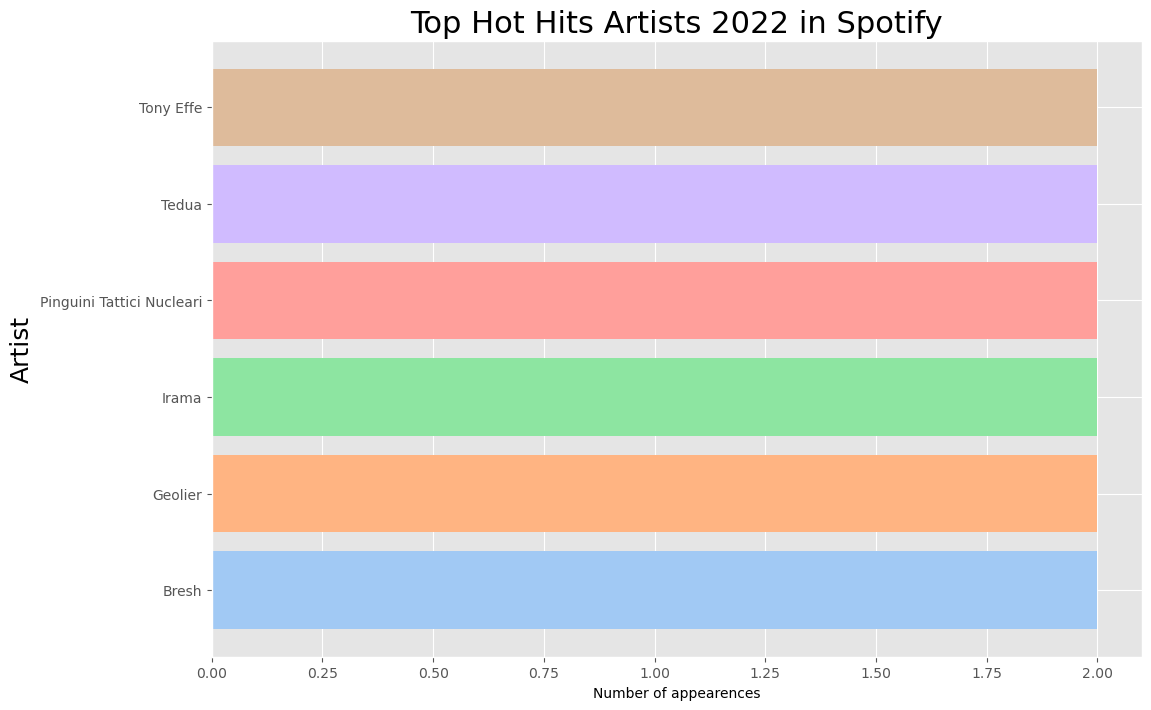

In [38]:
# Create a bar chart to visualize
plt.barh('Name_artist', 
         'N_appearences',
         data=sorted_top_artists,
         color=sns.color_palette('pastel'))
plt.title('Top Hot Hits Artists 2022 in Spotify', size=22)
plt.ylabel('Artist', size=18)
plt.xlabel('Number of appearences')

## Generi musicali più ascoltati
Qui creeremo un grafico a torta che mostrerà i generi presenti nella top 50.

In [39]:
# Clean the genres
for x in range(df_imp.shape[0]):
    try:
        df_imp['Genres_artist'][x] = df_imp['Genres_artist'][x][0]
    except:
        df_imp['Genres_artist'][x] = 'Unknown'
df_imp['Genres_artist']

0         italian hip hop
1         italian hip hop
2     pop virale italiano
3           indie liguria
4       italian adult pop
5       italian adult pop
6         italian hip hop
7                 Unknown
8       italian adult pop
9           bergamo indie
10      italian adult pop
11      italian adult pop
12                Unknown
13                Unknown
14      italian adult pop
15      argentine hip hop
16        italian hip hop
17              reggaeton
18      italian adult pop
19        italian hip hop
20                    pop
21        italian hip hop
22        italian hip hop
23        italian hip hop
24        italian hip hop
25        italian hip hop
26            dutch house
27        italian hip hop
28      italian adult pop
29      italian adult pop
30      italian adult pop
31          bergamo indie
32               big room
33        italian hip hop
34                art pop
35          indie liguria
36                Unknown
37        italian hip hop
38          

In [40]:
# Group by the genres
top_genres = df_imp.groupby(['Genres_artist'])['Genres_artist'].count().reset_index(name='N_tracks')
top_genres = top_genres[top_genres['N_tracks'] > 1]

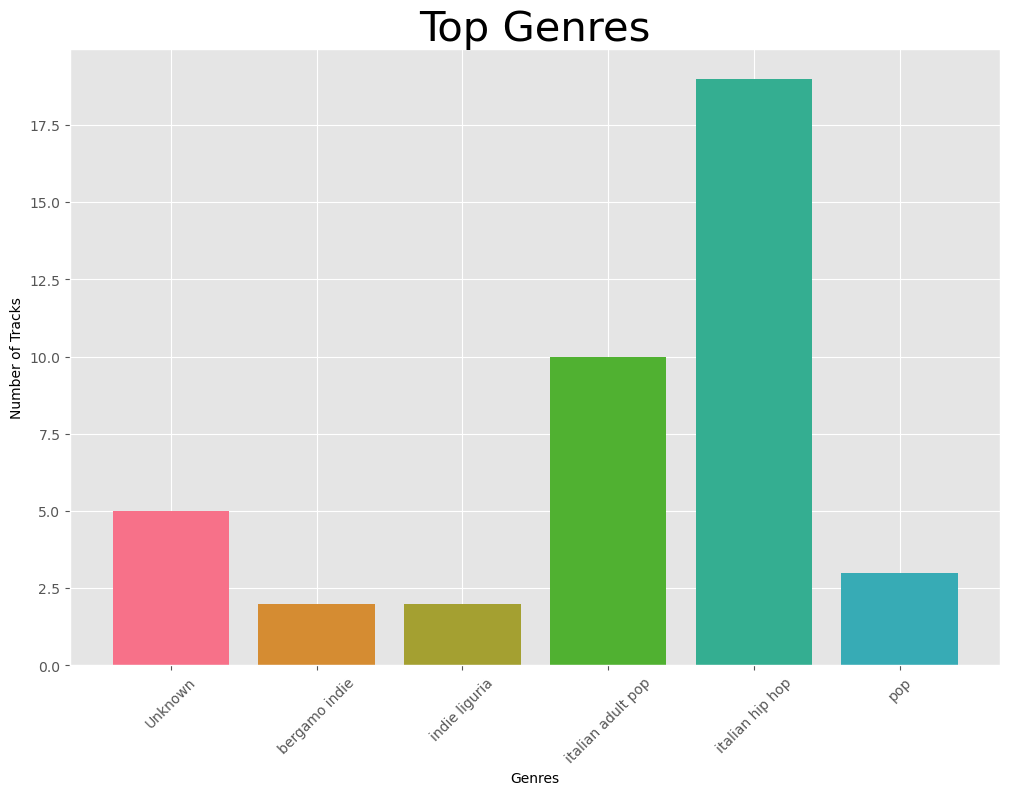

In [42]:
import matplotlib.pyplot as plt

plt.bar(top_genres['Genres_artist'], top_genres['N_tracks'], color=sns.color_palette("husl", 9))
plt.xlabel('Genres')
plt.ylabel('Number of Tracks')
plt.title('Top Genres', size=30)
plt.xticks(rotation=45)
plt.show()
